## Training the Model

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.36s/it]


Final metrics: 
Validation-Loss:  0.299
Validation-Accuracy:  80.2%
train-Loss:  0.295
train-Accuracy:  81.2%
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


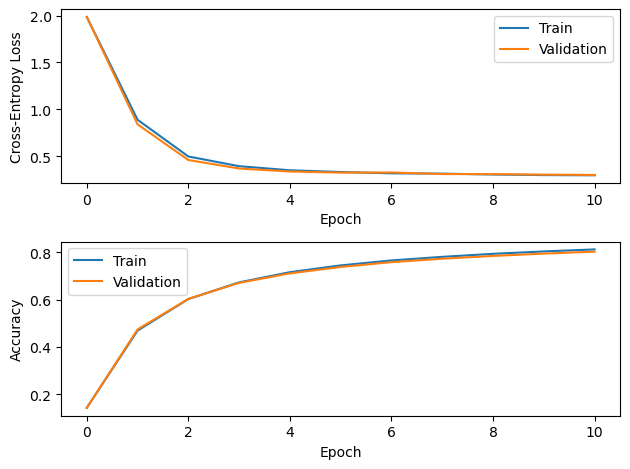

In [1]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

## Creating the LIME Explainer

In [2]:
import tensorflow as tf
import numpy as np
from data.datasets import DryBean
from data.util.utils import DatasetMode
dataset = DryBean(mode=DatasetMode.TRAIN)
dataset_test = DryBean(mode=DatasetMode.TEST)
feature_names = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccenticity','ConvexArea',
                 'EquivDiameter','Extent','Solidity','Roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
categories = list(dataset.categories.keys())


In [3]:
from model.attribution_methods.lime import Lime
lime_explainer = Lime(dataset_test.datapoints.numpy(),feature_names=feature_names,class_names=categories, kernel_width=1)

## Explaining an instance locally

In [4]:
i = np.random.randint(0, dataset_test.datapoints.numpy().shape[0])
print(dataset_test.datapoints.numpy()[i])
print(dataset_test.labels[i])
print(model.predict(dataset_test.datapoints[i]))
intercept, local_explanation, local_prediction, prediction_score = lime_explainer.attribute(dataset_test.datapoints.numpy()[i], model.predict, num_features=8)

[0.12121592 0.21398114 0.2261314  0.19962452 0.39965287 0.763372
 0.11916604 0.21509764 0.43831298 0.9088597  0.8092477  0.44915962
 0.5418416  0.34912217 0.4004963  0.8911739 ]
tensor([0., 0., 0., 0., 0., 0., 1.])
tensor([7.3940e-03, 2.4000e-10, 3.5650e-03, 3.0134e-02, 4.0603e-03, 2.9055e-03,
        9.5194e-01])


D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


In [5]:
print(intercept)
print(local_explanation)
print(local_prediction)
print(prediction_score)

{6: 0.5386670794722836}
{6: [(14, 0.057769354302321406), (4, 0.05899123524070168), (11, 0.059224084824755885), (10, 0.05930590310292994), (13, 0.05944491268115122), (7, 0.059568992968680685)]}
{6: 0.3698175541654498}
{6: array([0.89297156])}


## Submodular Pick

In [6]:
from model.attribution_methods.submodular import SubmodularPick
sp_explanations = SubmodularPick(lime_explainer, dataset_test.datapoints, model.predict, sample_size=20, no_exps=6, num_features=5)

D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
D:\University of Bonn\Semster 6\Projektgruppe\Project_Group_Attribution_Method\model\models.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an a

In [7]:
for exp in sp_explanations.sp_explanations :
    print(exp)

{5: [(4, 0.13969746264901783), (2, 0.13977148278078577), (8, 0.13977963124727852), (7, 0.13978503778739676), (11, 0.139898172617456)]}
{3: [(6, 0.12964579152506508), (12, 0.12982245157016367), (5, 0.12992210379013097), (3, 0.1300496286677079), (0, 0.13060248703001692)]}
{5: [(13, 0.10422195619923823), (5, 0.10422226295314384), (9, 0.10422237904378372), (2, 0.10422250128659415), (15, 0.10434738313125268)]}
{4: [(2, 0.14490369442276155), (15, 0.1449146051033992), (1, 0.1449302376214671), (7, 0.14493065874239638), (14, 0.14499404872088048)]}
{4: [(10, 0.13289239673333608), (4, 0.13292069083671992), (1, 0.13299915380115176), (0, 0.13302975245043516), (11, 0.1330796038334412)]}
{0: [(5, 0.0547377208080126), (3, 0.056005285553615676), (6, 0.05632545068016364), (7, 0.056502571279862454), (1, 0.05652885226115347)]}
